In [342]:
## Trying different clustering methods on the extracted feature arrays
## More note can be found in the trial and test note.docx

%matplotlib inline 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.mixture import GMM, DPGMM
from sklearn.pipeline import make_pipeline
from time import time
from sklearn import metrics
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np


# #import vectorized feature arrays for acts and scenes
act_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllAct_Features_Vectorize.txt',sep=',',header = None)
scene_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllScene_Features_Vectorize.txt',sep=',',header = None)
play_Vect = pd.read_csv('VectorizedFeatures/AllComplied/ALLPlay_Features_Vectorize.txt',sep=',',header = None)

#import LSA reduced vectorized feature arrays for acts and scenes
act_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Act_Features_Vectorize_LSA.txt',sep=',',header = None)
scene_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Scene_Features_Vectorize_LSA.txt',sep=',',header = None )
play_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Play_Features_Vectorize_LSA.txt',sep=',',header = None )

#import labels
act_Labels = pd.read_csv('LSA_VectorizedFeatures/act_feature_labels.txt',sep='\n',header = None)
scene_Labels= pd.read_csv('LSA_VectorizedFeatures/scene_feature_labels.txt',sep='\n',header = None )
play_Labels= pd.read_csv('LSA_VectorizedFeatures/play_feature_labels.txt',sep='\n',header = None )

# print(scene_Labels)
#     explained_variance = svd.explained_variance_ratio_.sum()
#     print(explained_variance)



In [341]:
### K cluster the 5000 feature vectorized array, much better clustering than LSA reduced ones
true_k = 2
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100000, n_init=1)

print("Clustering plays sparse data with %s" % km)
t0 = time()
km.fit(play_Vect)
print("done in %0.3fs" % (time() - t0))
klabels = km.labels_
kcentroids = km.cluster_centers_
print(km.labels_)

play_Vect = np.array(play_Vect)
# ## plot K-Means
# plt.figure(figsize=(10, 10))
# for i in range(true_k):
#     # plot data points
#     dplt = play_Vect[np.where(klabels==i)]
#     plt.plot(dplt[:,0],dplt[:,1],'o')
    
#     # plot centroids
#     lines = plt.plot(kcentroids[i,0],kcentroids[i,1],'kx')
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
# plt.show()
# print("\n Analysis: there is one major long strip cluster of all plays can be seen, and other 2 spreaded",\
# "clusters, K clustering does not work well in this scenariom need to try use GMM")

print("Clustering acts sparse data with %s" % km)
t0 = time()
km.fit(act_Vect)
print("done in %0.3fs" % (time() - t0))
klabels = km.labels_
kcentroids = km.cluster_centers_
print(km.labels_)
act_Vect_np = np.array(act_Vect)
## plot K-Means
# plt.figure(figsize=(20, 10))
# for i in range(true_k):
#     # plot data points
#     dplt = act_Vect_np[np.where(klabels==i)]
#     plt.plot(dplt[:,0],dplt[:,1],'o')
    
#     # plot centroids
#     lines = plt.plot(kcentroids[i,0],kcentroids[i,1],'kx')
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
# plt.show()
# print("\n Analysis: there is one major long strip cluster of all acts can be seen, and other 2 spreaded",\
# "clusters, K clustering does not work well in this scenariom need to try use GMM")


print("Clustering scene sparse data with %s" % km)
t0 = time()
km.fit(scene_Vect)
print(km.labels_)
print("done in %0.3fs" % (time() - t0))
klabels = km.labels_
kcentroids = km.cluster_centers_
print(km.labels_)
scene_Vect_np = np.array(scene_Vect)
## plot K-Means
# plt.figure(figsize=(10, 10))
# for i in range(true_k):
#     # plot data points
#     dplt = scene_Vect_np[np.where(klabels==i)]
#     plt.plot(dplt[:,0],dplt[:,1],'o')
    
#     # plot centroids
#     lines = plt.plot(kcentroids[i,0],kcentroids[i,1],'kx')
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
# plt.show()
# print("\n Analysis: there is one major long strip cluster of all scenes can be seen, and other 2 spreaded",\
# "clusters, K clustering does not work well in this scenariom need to try use GMM")

# print("\n Also consistency of the extracted features needs to be verified:"\
#       "the outlier plays contain the outlier acts, which contain those outlier scenes")

Clustering plays sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100000, n_clusters=2, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
done in 0.029s
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Clustering acts sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100000, n_clusters=2, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
done in 0.159s
[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1]
Clustering scene sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100000, n_clusters=2, n_init=

In [9]:
### K cluster the LSA reduced feature vectorized array

print("Clustering plays sparse data with %s" % km)
t0 = time()
km.fit(play_Vect_LSA)
print("done in %0.3fs" % (time() - t0))
print(km.labels_)



print("Clustering acts sparse LSA reduced data with %s" % km)
t0 = time()
km.fit(act_Vect_LSA)
print("done in %0.3fs" % (time() - t0))
print(km.labels_)

print("Clustering scene sparse data LSA reduced with %s" % km)
t0 = time()
km.fit(scene_Vect_LSA)
print(km.labels_)
print("done in %0.3fs" % (time() - t0))

Clustering plays sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=2, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
done in 0.002s
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Clustering acts sparse LSA reduced data with KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=2, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
done in 0.003s
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Clustering scene sparse data LSA reduced with KMeans(copy_x=True, init='k-means++', max_iter=100, n_cl

In [288]:
#### Validating clustering results using LSA reduced features


# play_Vect = np.array(play_Vect_LSA)
play_Vect.shape
true_k = 2
import random

# random.seed(10)
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000000, n_init=10)
km.fit(play_Vect_LSA)
klabels = km.labels_
# print(klabels)
# print(play_Labels)

if len(klabels[klabels == 1]) > len(klabels[klabels == 0]):
    minority = 0
else:
    minority = 1
play_Labels = np.array(play_Labels)
print('the outlier plays are \n')
for i in range(len(klabels)):
    if klabels[i] == minority:
        print(play_Labels[i])
        
km.fit(act_Vect_LSA)        
klabels = km.labels_
# print(klabels)
# print(play_Labels)

if len(klabels[klabels == 1]) > len(klabels[klabels == 0]):
    minority = 0
else:
    minority = 1
act_Labels = np.array(act_Labels)
outlier_act = []
string = ""
print('\n the outlier acts are belong to those plays \n')
for i in range(len(klabels)):
    if klabels[i] == minority:
        outlier_act.append(string.join(act_Labels[i]).split("_")[0])
#         outlier_act.append((act_Labels[i].split("_")))
print(set(outlier_act))


km.fit(scene_Vect_LSA)        
klabels = km.labels_
# print(klabels)
# print(play_Labels)

if len(klabels[klabels == 1]) > len(klabels[klabels == 0]):
    minority = 0
else:
    minority = 1
scene_Labels = np.array(scene_Labels)
outlier_scene = []
string = ""
print('\n the outlier scenes are belong to those plays \n')
for i in range(len(klabels)):
    if klabels[i] == minority:
        outlier_scene.append(string.join(scene_Labels[i]).split("_")[0])
#         outlier_act.append((act_Labels[i].split("_")))
print(set(outlier_scene))
        
# klabels.shape
# dplt = play_Vect[np.where(klabels == 1)]
# print(dplt)
# print(dplt[:,0],dplt[:,5000])
## plot K-Means
# plt.figure(figsize=(10, 10))
# for i in range(true_k):
#     # plot data points
#     dplt = play_Vect[np.where(klabels==i)]
#     plt.plot(dplt[:,0],dplt[:,4999],'o')
    
#     # plot centroids
# #     lines = plt.plot(kcentroids[i,0],kcentroids[i,1],'kx')
# #     plt.setp(lines,ms=15.0)
# #     plt.setp(lines,mew=2.0)
#     plt.xlim(-0.5,0.2)
#     plt.ylim(-0.05,0.05)
# plt.show()

the outlier plays are 

['the comedy of errors']
['the first part of king henry the fourth']
['the second part of king henry the fourth']
['the life of king henry the fifth']
['the first part of king henry the sixth']
['the second part of king henry the sixth']
['the third part of king henry the sixth']
['the life of king henry the eighth']
['the life and death of king john']
['the life and death of richard the second']
['the life and death of richard the third']

 the outlier acts are belong to those plays 

{'the life and death of richard the second', 'the comedy of errors', 'cymbeline', 'the first part of king henry the fourth', 'the second part of king henry the fourth', 'the first part of king henry the sixth', 'the life of king henry the eighth', 'the life and death of king john', 'the life of king henry the fifth', 'the third part of king henry the sixth', 'antony and cleopatra', 'the second part of king henry the sixth', 'the life and death of richard the third'}

 the outlier 

In [293]:
#### Validating clustering results using the vectorized 5000 feature arrays


play_Vect = np.array(play_Vect)
play_Vect.shape
true_k = 2
import random

# random.seed(10)
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000000, n_init=10)
km.fit(play_Vect)
klabels = km.labels_
# print(klabels)
# print(play_Labels)

if len(klabels[klabels == 1]) > len(klabels[klabels == 0]):
    minority = 0
else:
    minority = 1
play_Labels = np.array(play_Labels)
print('the outlier plays are \n')
for i in range(len(klabels)):
    if klabels[i] == minority:
        print(play_Labels[i])
        
km.fit(act_Vect)        
klabels = km.labels_
# print(klabels)
# print(play_Labels)

if len(klabels[klabels == 1]) > len(klabels[klabels == 0]):
    minority = 0
else:
    minority = 1
act_Labels = np.array(act_Labels)
outlier_act = []
string = ""
print('\n the outlier acts are belong to those plays \n')
for i in range(len(klabels)):
    if klabels[i] == minority:
        outlier_act.append(string.join(act_Labels[i]).split("_")[0])
#         outlier_act.append((act_Labels[i].split("_")))
print(set(outlier_act))


km.fit(scene_Vect)        
klabels = km.labels_
# print(klabels)
# print(play_Labels)

if len(klabels[klabels == 1]) > len(klabels[klabels == 0]):
    minority = 0
else:
    minority = 1
scene_Labels = np.array(scene_Labels)
outlier_scene = []
string = ""
print('\n the outlier scenes are belong to those plays \n')
for i in range(len(klabels)):
    if klabels[i] == minority:
        outlier_scene.append(string.join(scene_Labels[i]).split("_")[0])
#         outlier_act.append((act_Labels[i].split("_")))
print(set(outlier_scene))

the outlier plays are 

['the comedy of errors']
['the first part of king henry the fourth']
['the second part of king henry the fourth']
['the life of king henry the fifth']
['the first part of king henry the sixth']
['the second part of king henry the sixth']
['the third part of king henry the sixth']
['the life of king henry the eighth']
['the life and death of king john']
['the life and death of richard the second']
['the life and death of richard the third']

 the outlier acts are belong to those plays 

{'the life and death of richard the second', 'the comedy of errors', 'the second part of king henry the fourth', 'the first part of king henry the fourth', 'the first part of king henry the sixth', 'the life and death of king john', 'the life of king henry the fifth', 'the third part of king henry the sixth', 'the second part of king henry the sixth', 'the life and death of richard the third'}

 the outlier scenes are belong to those plays 

{'the life and death of richard the sec

In [373]:
### Calculate the plays, acts, scenes on one axis using euclidien distance for future visualization
from scipy.spatial import distance

## Calculate euclidean distance among plays, acts, scenes
zero = [0] * 5000
dist = []

## Calculate for plays
for i in range(len(play_Vect)):
    dst = distance.euclidean(zero,play_Vect[i:i+1])
    dist.append(dst)

dist_play = {}
play_Labels = np.array(play_Labels)
string = ""

for i in range(len(dist)):
    dist_play[string.join(play_Labels[i])] = dist[i]
print("\n The euclidean distance  of each play are :\n")
print( dist_play)
print("\n Analysis: euclidean distance of the plays are very very close to each other, thus it does NOT seem to be a good", \
" to be used" )

## Calculate for acts
dist = []
for i in range(len(act_Vect)):
    dst = distance.euclidean(zero,act_Vect[i:i+1])
    dist.append(dst)


dist_act = {}
act_Labels = np.array(act_Labels)
string = ""

for i in range(len(dist)):
    dist_act[string.join(act_Labels[i])] = dist[i]
print("\n The euclidean distance  of each act are :\n")
print(dist_act)
print("\n Analysis: euclidean distance of the acts are very very close to each other, thus it does NOT seem to be a good", \
" to be used" )



## Calculate for scenes
dist = []
for i in range(len(scene_Vect)):
    dst = distance.euclidean(zero,scene_Vect[i:i+1])
    dist.append(dst)


dist_scene = {}
scene_Labels = np.array(scene_Labels)
string = ""

for i in range(len(dist)):
    dist_scene[string.join(scene_Labels[i])] = dist[i]
print("\n The euclidean distance  of each scene are :\n")
print(dist_scene)
print("\n Analysis: euclidean distance of the scenes are very very close to each other, thus it does NOT seem to be a good", \
" to be used" )




 The euclidean distance  of each play are :

{'othello, the moore of venice': 1.0000000000000044, 'timon of athens': 0.9999999999999992, 'titus andronicus': 1.0000000000000024, 'troilus and cressida': 1.0000000000000027, "all's well that ends well": 0.999999999999999, 'the comedy of errors': 1.0000000000000029, 'the tragedy of hamlet, prince of denmark': 0.9999999999999978, 'cymbeline': 0.9999999999999989, 'the merry wives of windsor': 1.0000000000000016, 'the life and death of richard the third': 0.9999999999999993, 'the first part of king henry the sixth': 1.000000000000002, 'the life of king henry the eighth': 1.0000000000000009, 'the life and death of king john': 1.000000000000001, 'the life of king henry the fifth': 1.0000000000000024, 'king lear': 1.0, 'antony and cleopatra': 1.0000000000000042, 'loves labours lost': 1.0000000000000002, 'the tempest': 1.0, 'as you like it': 1.0, "winter's tale": 0.9999999999999993, 'the tragedy of macbeth': 1.0000000000000024, 'the life and deat

In [385]:
### Calculate the plays, acts, scenes on one axis using euclidien distance for future visualization
# canberra~chebyshev > Manhattan(cityblock) > Hamming~Matching > Euclienda
#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
from scipy.spatial import distance

## Calculate euclidean distance among plays, acts, scenes
zero = [0] * 5000
dist = []

## Calculate for plays
for i in range(len(play_Vect)):
    dst = distance.chebyshev(zero,play_Vect[i:i+1])
    dist.append(dst)

dist_play = {}
play_Labels = np.array(play_Labels)
string = ""

for i in range(len(dist)):
    dist_play[string.join(play_Labels[i])] = dist[i]
print("\n The euclidean distance  of each play are :\n")
print( dist_play)


 The euclidean distance  of each play are :

{'othello, the moore of venice': 0.54805779445077407, 'timon of athens': 0.53759220978698641, 'titus andronicus': 0.30741050190543334, 'troilus and cressida': 0.34899698864653278, "all's well that ends well": 0.21363768010262843, 'the comedy of errors': 0.79914314356308447, 'the tragedy of hamlet, prince of denmark': 0.41819644884174217, 'cymbeline': 0.26200046644116221, 'the merry wives of windsor': 0.46048064860902138, 'the life and death of richard the third': 0.51138587335321972, 'the first part of king henry the sixth': 0.44281916092283968, 'the life of king henry the eighth': 0.35225713516574331, 'the life and death of king john': 0.3113546383247322, 'the life of king henry the fifth': 0.53813516915799364, 'king lear': 0.34059548219327063, 'antony and cleopatra': 0.44524412528139651, 'loves labours lost': 0.45786075751056771, 'the tempest': 0.42986013401140366, 'as you like it': 0.32452898859628831, "winter's tale": 0.2495400411853521

GMM Clustering acts sparse LSA reduced data with
Means of GMM
[[  1.13003541e-128   2.63385196e-003   3.79955208e-003 ...,
    1.22879752e-002   1.00354899e-003   1.18039609e-003]
 [  1.96131188e-111   2.33135818e-112   1.01467720e-003 ...,
    6.88601166e-003   4.71153392e-003   6.63368967e-004]
 [  4.79327301e-003   1.17247534e-003   2.15387444e-003 ...,
    1.11673569e-002   1.24020526e-003   7.74562149e-004]
 [  2.57805262e-118   4.62810401e-116   8.38898821e-071 ...,
    9.46733321e-003   2.22802393e-087   6.04454673e-098]]
Covariance of GMM
[[[  1.00000000e-003  -2.97634377e-131  -4.29362839e-131 ...,
     1.95607406e-130  -1.13404589e-131  -1.33388938e-131]
  [ -2.97634377e-131   1.37247750e-003  -1.00074577e-005 ...,
     6.94295055e-005  -2.64319946e-006  -3.10898856e-006]
  [ -4.29362839e-131  -1.00074577e-005   1.24553307e-003 ...,
    -2.53073471e-005   2.43099866e-007  -4.48497643e-006]
  ..., 
  [  1.95607406e-130   6.94295055e-005  -2.53073471e-005 ...,
     1.47466023e-

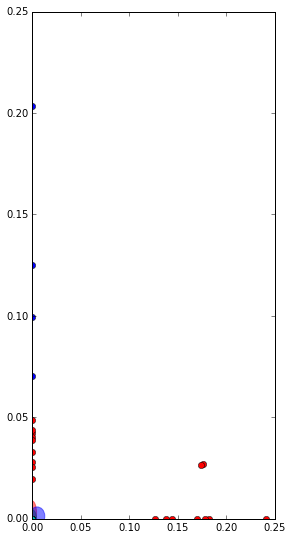

In [17]:
## function to plot ellipses 

# k = 4
# scene_Vect = np.array(scene_Vect)
# def make_ellipses(gmm, ax):
#     for n, color in enumerate('rgb'):
#         v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])
#         u = w[0] / np.linalg.norm(w[0])
#         angle = np.arctan2(u[1], u[0])
#         angle = 180 * angle / np.pi  # convert to degrees
#         v *= 9
#         ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
#                                   180 + angle, color=color)
#         ell.set_clip_box(ax.bbox)
#         ell.set_alpha(0.5)
#         ax.add_artist(ell)
# print("GMM Clustering acts sparse LSA reduced data with")
# t0 = time()
# # fit GMM with covariance_type = full 
# gmm = GMM(n_components=k, n_init=30, covariance_type='full')
# gmm.fit(scene_Vect)
# glabels = gmm.predict(scene_Vect)
# gmeans = gmm.means_
# gcovar = gmm.covars_
# print("Means of GMM")
# print(gmeans)
# print("Covariance of GMM")
# print(gcovar)
# print("done in %0.3fs" % (time() - t0))

# plt.figure(figsize=(20, 20))
# h = plt.subplot(2, 2*k / 2, 1)
# make_ellipses(gmm, h)

# for i in range(k):
#     # plot data points
#     dplt = scene_Vect[np.where(glabels==i)]
#     plt.plot(dplt[:,0],dplt[:,1],'o')

# plt.show()